## ANLP Assignment 1: Sentiment Analysis
### Christopher Hamilton,  a1766121

In [1]:
import json
import os

import pandas as pd
import numpy as np

### 1. Reading dataset and initial pre-processing

In [2]:
def read_json_to_df(file_name):
    data = []
    with open(file_name) as data_file:
        for line in data_file:
            # Load each line of the JSON file as a dictionary
            data.append(json.loads(line))

    # Form a Pandas DataFrame from the dictionaries
    return pd.json_normalize(data)

# Load the training and test data
raw_train_df = read_json_to_df("hotel_reviews_train.json")
raw_test_df = read_json_to_df("hotel_reviews_test.json")

In [3]:
# Print out the initially loaded dataframes
raw_train_df.head()

,title,text,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile,ratings.service,ratings.cleanliness,...,ratings.rooms,author.username,author.num_reviews,author.id,author.location,author.num_cities,author.num_helpful_votes,author.num_type_reviews,ratings.check_in_front_desk,ratings.business_service_(e_g_internet_access)
0,“Horrible experience”,First of all we got there and they didn't have...,September 2012,80138,0,"September 19, 2012",140716137,False,1.0,2.0,...,1.0,Kh3RD,1.0,AB404BB664D653ECF79DE0E0867F6D34,"Las Vegas, Nevada",NaN,NaN,NaN,NaN,NaN
1,“Stay Away”,Found Racist graffiti in the room. Request to ...,June 2011,240151,1,"June 27, 2011",114807323,False,1.0,1.0,...,NaN,TheUglyPhotographer,4.0,BB116F87FE8F9AB356F63853BFD32FFE,"Oceanside, California",3.0,4.0,4.0,NaN,NaN
2,“Great location and service”,Close to Union Square - hotel is a bit of a ma...,October 2010,80793,0,"October 25, 2010",84805430,False,4.0,5.0,...,4.0,Moonstonemoclips,48.0,F3D0CF371B788300E73A1413B2DABB4B,Kirkland,31.0,27.0,32.0,NaN,NaN
3,“I will never go back here again!”,I had a bad vibe about this place from the mom...,June 2012,111418,1,"June 28, 2012",132971117,False,3.0,2.0,...,1.0,JoanellenJ,22.0,BC6BC07F81B768F78B6CE17A18762C11,New York,10.0,9.0,5.0,NaN,NaN
4,“Ripped off our VISA card after departure”,"After we received our ""final"" bill and left th...",January 2012,671150,3,"February 4, 2012",124104157,False,NaN,NaN,...,NaN,Lynnworks,3.0,F7E9D044FA2554FD06A871289312E043,Providence,3.0,7.0,3.0,NaN,NaN


In [4]:
raw_test_df.head()

,title,text,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile,ratings.service,ratings.cleanliness,...,ratings.rooms,author.username,author.num_cities,author.num_helpful_votes,author.num_reviews,author.num_type_reviews,author.id,author.location,ratings.check_in_front_desk,ratings.business_service_(e_g_internet_access)
0,“I was SO surprised! I WILL return!”,My husband and I just celebrated our 25th wedd...,November 2011,1783324,1,"November 26, 2011",121063682,False,5.0,5.0,...,5.0,shooflyfarm,15.0,12.0,30.0,11.0,02C39D355EE31BFA82F2724523782A92,"Opelika, Alabama",NaN,NaN
1,“A Mother/Daughter vacation”,I could not leave a bad comment on any part of...,August 2011,88458,0,"August 10, 2011",116545869,False,5.0,5.0,...,NaN,bestmpm,NaN,NaN,1.0,NaN,8F37B44FE89FD626313A7CB4B381FE40,Chattanooga,NaN,NaN
2,“Good Choice for Pre-cruise”,I spent one night at this hotel prior to a cru...,November 2010,82868,0,"December 6, 2010",89196759,False,5.0,5.0,...,5.0,Conner2dood,20.0,39.0,26.0,24.0,5E57B2B21C69F07E617D67C748DF010A,Pennsylvania,NaN,NaN
3,“Unsung Hero”,"For the past year and a half, my daughter has ...",July 2011,98979,0,"July 28, 2011",115879719,False,5.0,5.0,...,NaN,LeviK,2.0,NaN,2.0,NaN,D7E5C22B3A877DEA1434B18E797FEE19,,NaN,NaN
4,"“Great Value for a King, Queen, and Princesses.”","Great Value for a King, Queen, and Princesses....",March 2007,112273,8,"March 21, 2007",7198417,False,5.0,5.0,...,5.0,thomrho,13.0,25.0,27.0,4.0,EEE6C615C8EBCA4AFD2774810E590274,"albuquerque, nm",5.0,5.0


In [5]:
# Select the title, text and overall rating columns to make a new dataframe
train_df = raw_train_df[["title", "text", "ratings.overall"]]
test_df = raw_test_df[["title", "text", "ratings.overall"]]

# Check the value counts for the ratings
print("Training data ratings")
print(train_df["ratings.overall"].value_counts())

print()

print("Test data ratings")
print(test_df["ratings.overall"].value_counts())

Training data ratings
ratings.overall
5.0    9825
4.0    7720
3.0    3287
2.0    1611
1.0    1557
Name: count, dtype: int64

Test data ratings
ratings.overall
5.0    2468
4.0    1933
3.0     793
2.0     420
1.0     385
0.0       1
Name: count, dtype: int64


In [6]:
# Find indices of rows where the rating is 0
zero_rating_indices = test_df[test_df['ratings.overall'] == 0].index
for index in zero_rating_indices:
    # Print the text corresponding to the zero rating
    print(test_df['text'][index])

Best location. Right where Pier 39 is. Lots of things to do around the area, restaurants and sight seeing. Staff are friendly. Great service. Will come back again :)


In [7]:
# Based on the above text, it is unlikely the reviewer meant to give a low rating
# Instead, we will remvoe the 0 from the dataset
test_df = test_df.drop(zero_rating_indices)

In [8]:
# Check the value counts for the ratings after the 0 rating has been removed
print("Test data ratings")
print(test_df["ratings.overall"].value_counts())

Test data ratings
ratings.overall
5.0    2468
4.0    1933
3.0     793
2.0     420
1.0     385
Name: count, dtype: int64


Python's lambda functions can be used to remove the special characters from the dataset. Pandas DataFrames columns include an `apply` method that can take in a lambda function to apply to each cell in the column. By including a lambda function that will only include characters which are alphanumeric or spaces, the special characters can be removed from the dataset (Saturn Cloud 2024).

At the same time, we can apply the `lower()` function on each character to convert all the text to lowercase. This can be seen by viewing the first few rows with the `head()` function on the DataFrames.

In [9]:
# Remove remove non-alphanumeric characters from the title and text columns
train_df.loc[:, 'title'] = train_df['title'].apply(lambda x: ''.join(char.lower() for char in x if char.isalnum() or char.isspace()))
train_df.loc[:, 'text'] = train_df['text'].apply(lambda x: ''.join(char.lower() for char in x if char.isalnum() or char.isspace()))

test_df.loc[:, 'title'] = test_df['title'].apply(lambda x: ''.join(char.lower() for char in x if char.isalnum() or char.isspace()))
test_df.loc[:, 'text'] = test_df['text'].apply(lambda x: ''.join(char.lower() for char in x if char.isalnum() or char.isspace()))

In [10]:
train_df.head()

,title,text,ratings.overall
0,horrible experience,first of all we got there and they didnt have ...,1.0
1,stay away,found racist graffiti in the room request to c...,1.0
2,great location and service,close to union square hotel is a bit of a maz...,4.0
3,i will never go back here again,i had a bad vibe about this place from the mom...,2.0
4,ripped off our visa card after departure,after we received our final bill and left the ...,1.0


In [11]:
test_df.head()

,title,text,ratings.overall
0,i was so surprised i will return,my husband and i just celebrated our 25th wedd...,5.0
1,a motherdaughter vacation,i could not leave a bad comment on any part of...,5.0
2,good choice for precruise,i spent one night at this hotel prior to a cru...,4.0
3,unsung hero,for the past year and a half my daughter has b...,5.0
4,great value for a king queen and princesses,great value for a king queen and princesses we...,5.0


The provided code for the `language_filter.py` file includes an example of using the `langdetect` Python package to filter for only English text. Rather than applying the filter for only English reviews when reading the file, we can apply the filter on the loaded DataFrames using a similar method to above. By using the Pandas `apply` method on the text and title columns, the returned DataFrame will only include rows where both the title and text are in English as determined by the `langdetect` package.

In [12]:
from langdetect import detect as detect_language

def filter_english_reviews(df):
    def is_english(text):
        try:
            return detect_language(text) == "en"
        except:
            return False

    # Filter the DataFrame for reviews where both title and text are in English
    return df[df['text'].apply(is_english) & df['title'].apply(is_english)]

Since the language detecting process takes some time over the whole dataset, to save time during development, the filtered DataFrames can be saved and loaded from CSV. Since these DataFrames will not change, and all preprocessing steps are the same, running the language filter each time is not necessary. I have written some quick checks to see if the files have already been saved, and if they have load them, otherwise run the language check code and save the files for later.

In [13]:
# Save the English reviews to a CSV file to save time filtering when running again (NumFOCUS, Inc. 2024)
if os.path.exists("english_hotel_reviews_train.csv"):
    train_df = pd.read_csv("english_hotel_reviews_train.csv")
else:
    train_df = filter_english_reviews(train_df)
    train_df.to_csv("english_hotel_reviews_train.csv", index=False)

if os.path.exists("english_hotel_reviews_test.csv"):
    test_df = pd.read_csv("english_hotel_reviews_test.csv")
else:
    test_df = filter_english_reviews(test_df)
    test_df.to_csv("english_hotel_reviews_test.csv", index=False)

In [14]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18107 entries, 0 to 18106
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            18107 non-null  object 
 1   text             18107 non-null  object 
 2   ratings.overall  18107 non-null  float64
dtypes: float64(1), object(2)
memory usage: 424.5+ KB
None


In [15]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4524 entries, 0 to 4523
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            4524 non-null   object 
 1   text             4524 non-null   object 
 2   ratings.overall  4524 non-null   float64
dtypes: float64(1), object(2)
memory usage: 106.2+ KB
None


### 2. Exploratory Data Analysis (EDA)

In [16]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/dev/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/dev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

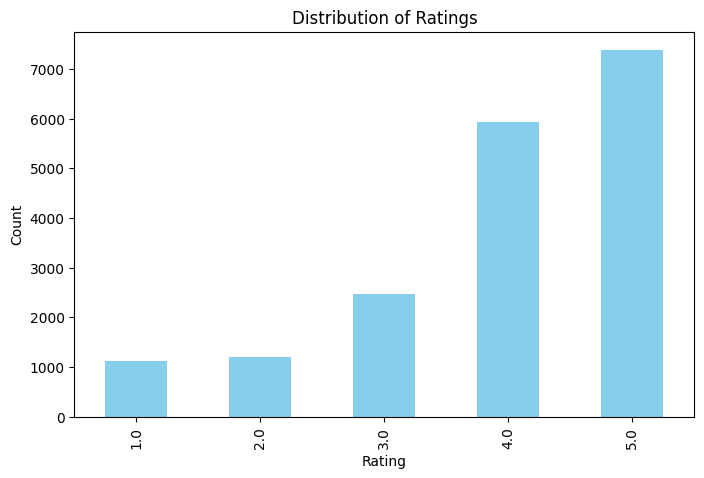

In [17]:
import matplotlib.pyplot as plt

# Plot distribution of ratings
train_df['ratings.overall'].value_counts().sort_index().plot(kind='bar', figsize=(8,5), color='skyblue')

plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.show()

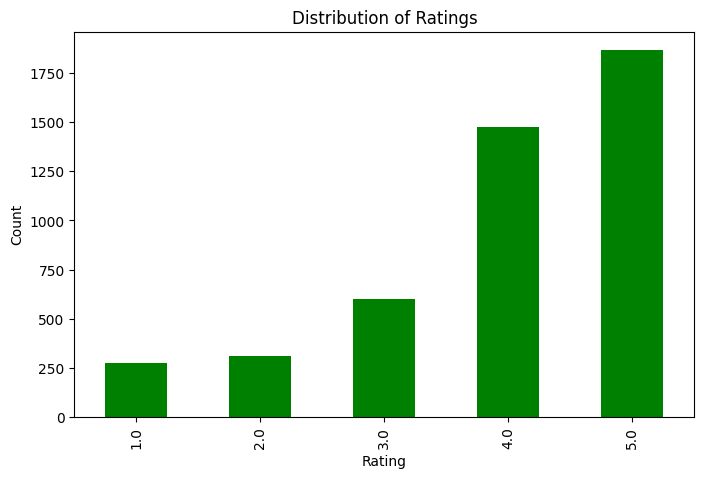

In [18]:
import matplotlib.pyplot as plt

# Plot distribution of ratings
test_df['ratings.overall'].value_counts().sort_index().plot(kind='bar', figsize=(8,5), color='green')

plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.show()

The distribution of the ratings can be plotted on a bar chart for both the training and test data. From the charts above, it is clear that most of the ratings for the hotels in the hotel booking company are positive, with a similar distribution of ratings across the training and testing sets.

Based on the code provided as part of Workshop 2, the predictive and non-predictive words in the dataset can be found using the TF-IDF (Term Frequency-Inverse Document Frequency) (Feature Engineering 2025). From TF-IDF, the words with the correlations closest to 0 indicate a very small effect on the prediction, whereas the words with a correlation higher indicate they are more positive and words with a more negative correlation indicate they are more negative.

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tf_idf_train = vectorizer.fit_transform(train_df["text"])

# Convert to DataFrame
tfidf_df = pd.DataFrame(tf_idf_train.toarray(), columns=vectorizer.get_feature_names_out())

# Find the correlations with the ratings
correlations = tfidf_df.corrwith(train_df["ratings.overall"])
correlations = correlations.sort_values(ascending=False)

# Find 10 words with the weakest correlation by sorting
non_predictive_words = correlations.sort_values(key=lambda x: np.abs(x))
print("Non-Predictive Words:\n", non_predictive_words.head(10))

# Display top 10 positive and negative correlated words
print("Most Positive Words:\n", correlations.head(10))
print("\nMost Negative Words:\n", correlations.tail(10))

Non-Predictive Words:
 critisism     -3.630288e-07
grandma       -3.825844e-07
approaching   -7.587266e-07
campus        -9.823678e-07
whistles       9.995013e-07
multilevel    -2.720054e-06
sirius        -3.627844e-06
hospitably     3.745210e-06
format        -4.205995e-06
upload        -5.597163e-06
dtype: float64
Most Positive Words:
 great          0.245037
staff          0.191420
friendly       0.167738
comfortable    0.155392
and            0.154539
helpful        0.150268
wonderful      0.149302
perfect        0.143355
excellent      0.139939
very           0.133812
dtype: float64

Most Negative Words:
 terrible   -0.153617
they       -0.179330
said       -0.179603
rude       -0.186292
that       -0.200618
worst      -0.211617
dirty      -0.215988
no         -0.221317
told       -0.258012
not        -0.308856
dtype: float64


As shown above, some of the most positive words are: "great", "staff", "friendly", and "comfortable". Some of the most negative words are: "terrible", "they", "said", and "rude". Some of the least predictive words are: "criticism", "grandma", "approaching", and "campus".

In order to find the number of unique words, the text can be converted into a list of tokens, and the number of unique tokens can then easily be found with `numpy`. Given that the data to be used for classification into the ratings is the textual review data, the title and text columns can be combined into a single text column. To make analysis simpler, the overall rating column can also be renamed to just rating. At this stage the stop words are also removed from the dataset.

In [20]:
from nltk.corpus import stopwords

# Create a column with the title and text together
train_df["combined_text"] = train_df["title"] + " " + train_df["text"]
test_df["combined_text"] = test_df["title"] + " " + test_df["text"]

train_df = train_df.drop(columns=["title", "text"])
test_df = test_df.drop(columns=["title", "text"])
train_df = train_df.rename(columns={"ratings.overall": "rating", "combined_text": "text"})
test_df = test_df.rename(columns={"ratings.overall": "rating", "combined_text": "text"})

stop_words = set(stopwords.words('english'))
train_df["text"] = train_df["text"].apply(lambda text: ' '.join([word for word in text.split(' ') if word not in stop_words]))
test_df["text"] = test_df["text"].apply(lambda text: ' '.join([word for word in text.split(' ') if word not in stop_words]))

# Split all reviews into words and find unique ones
all_words_text = np.concatenate(train_df.text.apply(nltk.word_tokenize).to_numpy())

unique_words = np.unique(all_words_text)

print("Total Unique Words:", len(unique_words))

Total Unique Words: 46531


In [21]:
train_df.head()

,rating,text
0,4.0,great location service close union square hot...
1,2.0,never go back bad vibe place moment walked mai...
2,1.0,ripped visa card departure received final bill...
3,4.0,great location steps grand central well situat...
4,3.0,location hotel located right heart san francis...


In [22]:
test_df.head()

,rating,text
0,5.0,surprised return husband celebrated 25th weddi...
1,5.0,motherdaughter vacation could leave bad commen...
2,4.0,good choice precruise spent one night hotel pr...
3,5.0,great value king queen princesses great value ...
4,5.0,learning lessons highend chains tremendous hot...


The most frequent words in the dataset can be plotted on a bar chart. Stop words are removed for this analysis so that the chart is not filled with very common words such as 'the' or 'is'.

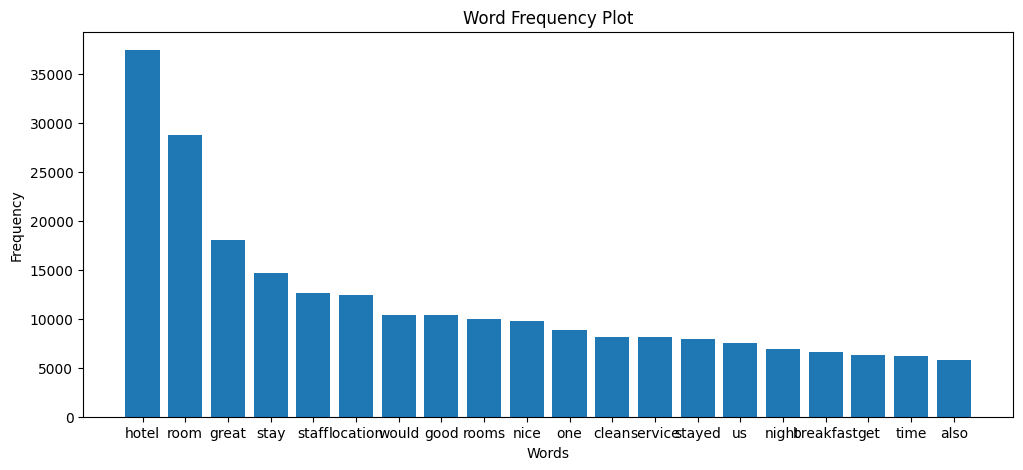

In [23]:
from collections import Counter
import matplotlib.pyplot as plt

tokens = [word for word in all_words_text if word not in stop_words]
word_freq = Counter(tokens)

plt.figure(figsize=(12, 5))
plt.bar(*zip(*word_freq.most_common(20)))
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Plot")
plt.show()


Given that this dataset is for hotel reviews, it is not unexpected that the most common words in the dataset would be related to hotels. In particular, the most common words are: "hotel", "room", "great", "stay", and "staff", which is to be expected due to the nature of the text.

The most common trigrams in the dataset can give us insight into common phrases that are used in the dataset. (Exploratory Data Analysis 2025) These sequences can be calculated and listed as well as plotted on a chart for viewing.

Distribution of 3-grams:
within walking distance: 745
hotel great location: 675
front desk staff: 668
staff friendly helpful: 551
would definitely stay: 525
great place stay: 393
would recommend hotel: 282
empire state building: 274
flat screen tv: 266
would highly recommend: 254
stayed one night: 251
highly recommend hotel: 248
great location great: 238
new york city: 233
called front desk: 205
great hotel great: 199
right across street: 199
hotel good location: 189
recommend hotel anyone: 183
would definitely recommend: 168
easy walking distance: 152
great location stayed: 149
stayed 3 nights: 145
hotel staff friendly: 132
stay great location: 129
stayed two nights: 124
king size bed: 123
room clean comfortable: 121
walk times square: 121
stayed 4 nights: 120
home away home: 119
right next door: 116
good value money: 113
front desk clerk: 113
location location location: 112
made us feel: 112
really enjoyed stay: 109
stayed 2 nights: 109
friendly helpful staff: 108
nice hotel great: 1

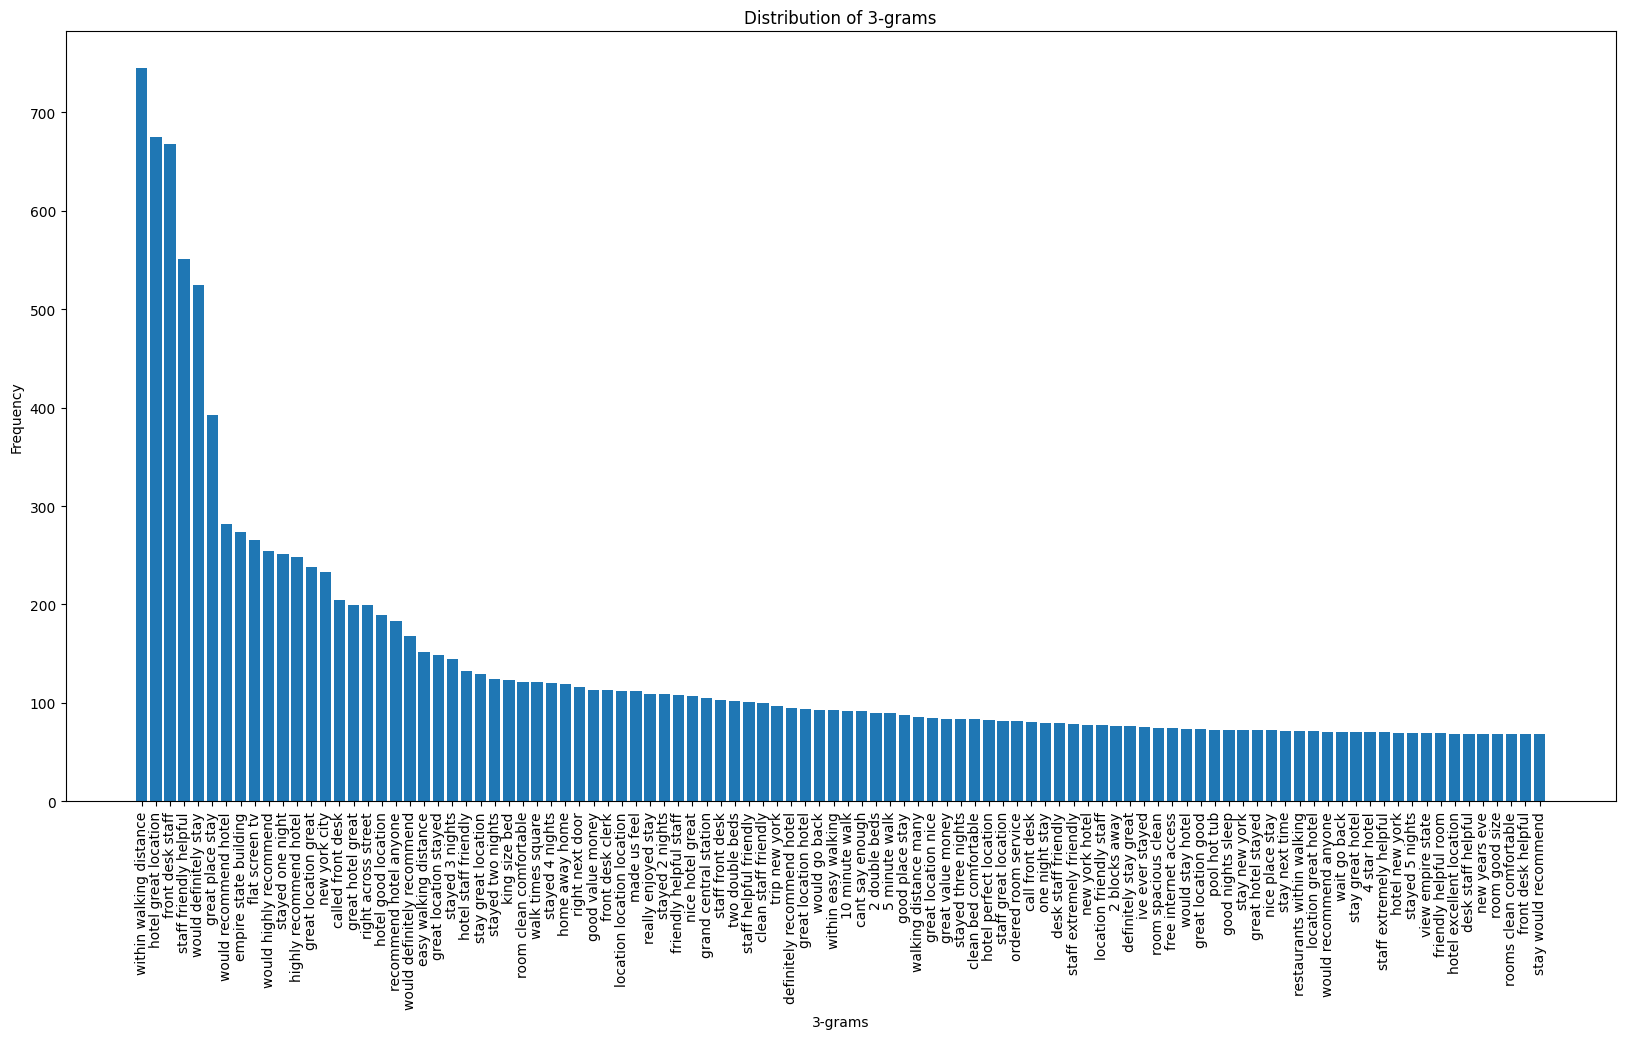

In [24]:
from nltk import ngrams
from collections import Counter
import matplotlib.pyplot as plt

# Function to generate n-grams
def generate_ngrams(text, n):
    n_grams = ngrams(text, n)
    return [' '.join(gram) for gram in n_grams]

# Specify the value of n for n-grams
n_value = 3

# Generate n-grams
ngrams_list = generate_ngrams(tokens, n_value)

# Count the occurrences of each n-gram
ngrams_count = Counter(ngrams_list)
most_common_ngrams = ngrams_count.most_common(100)

# Display the distribution
print(f"Distribution of {n_value}-grams:")
for ngram, count in most_common_ngrams:
    print(f"{ngram}: {count}")

# Plot the distribution
labels, values = zip(*most_common_ngrams)
indexes = range(len(labels))

plt.figure(figsize=(20, 10))
plt.bar(indexes, values)
plt.xlabel(f'{n_value}-grams')
plt.ylabel('Frequency')
plt.xticks(indexes, labels, rotation='vertical')
plt.title(f'Distribution of {n_value}-grams')
plt.show()

The most common tri-grams in the dataset are: "within walking distance" with 745 occurences, "hotel great location" with 675 occurences, "front desk staff" with 668 occurences, "staff friendly helpful" with 551 occurences, "would definitely stay" with 525 occurences, "great place stay" with 393 occurences. It should be noted that these most common tri-grams are all positive, and this makes sense since the distribution of ratings tends to be more towards the higher rated hotels.

### 3. Selection and training Machine Learning models

When training machine learning models, the dataset should be balanced to ensure that there is no bias to any one category. In the training dataset, there are more positive reviews than negative, and as a result the trained model may become biased towards classifying text positively. To address this, it is possible to use oversampling to create a data set for training that includes an equal number for each category. (Income Evaluation Notebook 2025)

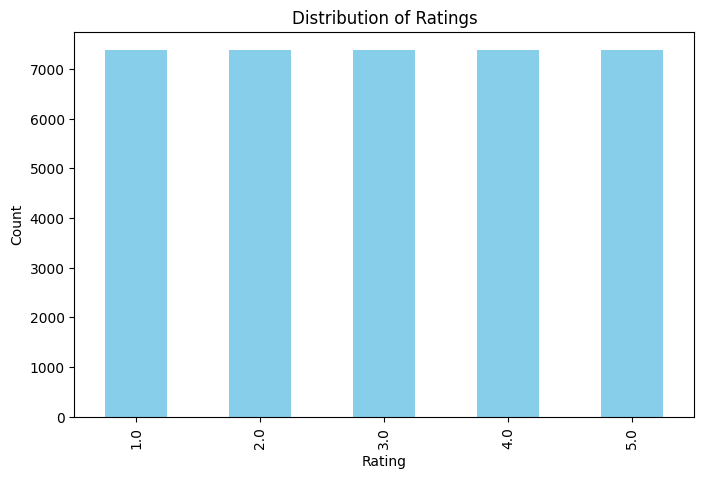

In [25]:
# Balance the training data by oversampling
def balance_data_oversample(df):
    max_count = df['rating'].value_counts().max()
    balanced_df = pd.DataFrame()

    for rating in df['rating'].unique():
        rating_df = df[df['rating'] == rating]
        balanced_df = pd.concat([balanced_df, rating_df.sample(max_count, replace=True)])

    return balanced_df
balanced_train_df = balance_data_oversample(train_df)

# Plot distribution of ratings
balanced_train_df['rating'].value_counts().sort_index().plot(kind='bar', figsize=(8,5), color='skyblue')

plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.show()

The text is already in lowercase and stop words have been removed from the dataset. To prepare the data for machine learning, the text can be lemmatised. Lemmatisation is one method for reducing words to their base forms, and this can be included in the preprocessing of data before a machine learning technique is applied to improve results. (Murel 2023)

In [26]:
# Lemmatize the text
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
balanced_train_df.loc[:, 'text'] = balanced_train_df['text'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x.split()))
test_df.loc[:, 'text'] = test_df['text'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x.split()))

[nltk_data] Downloading package wordnet to /home/dev/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


The classical machine learning method that will be used in this experiment in Multinomial Naive Bayes. This classification algorithm "simplifies the process of classifying text by assuming that the presence of one word doesn’t depend on others", which "makes it computationally efficient and reliable for a range of tasks" (Sriram 2024). In order to train the Multinomial Naive Bayes classifier, the data must be arranged into a training and validation set.

The Scikit Learn Python module includes a function to automatically split a dataset into a training and testing set or a training an validation set. For the training that is to be completed in this experiment, 80% of the data will be used for training and 20% will be used for validation.

In [27]:
from sklearn.model_selection import train_test_split

X_res = balanced_train_df["text"]
y_res = balanced_train_df["rating"]

X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2, shuffle=True)

In [28]:
# (Feature Engineering 2025)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_val_vectors = vectorizer.transform(X_val)

In [29]:
from sklearn.model_selection import cross_val_score

#### Multinomial Naive Bayes

In [30]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()

In [31]:
# (Income Evaluation Notebook 2025)
nb_accuracies = cross_val_score(classifier, X_train_vectors, y_train, cv=5)
classifier.fit(X_train_vectors, y_train)
print(f"Naive Bayes Train Score: {round(np.mean(nb_accuracies) * 100, 2)}%")

Naive Bayes Train Score: 78.06%


In [32]:
naive_bayes_score = classifier.score(X_val_vectors, y_val)
print(f"Naive Bayes Validation Score: {round(naive_bayes_score * 100, 2)}%")

Naive Bayes Validation Score: 78.11%


After training the Multinomial Naive Bayes classifier on the training data and testing the accuracy on the validation data, it is clear that the classification has performed quite well. The accuracy percentages are shown above, and this model could be considered to evaluate using the test data as well. However, a deep learning model should also be trained to determine how well it performs.

To do this, Tensorflow and Keras will be used. Some extra configuration is needed for Tensorflow to make use of the GPU, without encountering memory issues, as shown below.

In [33]:
import tensorflow as tf

# Limit GPU memory usage
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.set_logical_device_configuration(
                gpu,
                [tf.config.LogicalDeviceConfiguration(memory_limit=(6 * 1024))])
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

2025-04-05 14:23:48.506640: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-05 14:23:50.132307: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743825230.486125   32083 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743825230.598994   32083 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743825231.481814   32083 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

1 Physical GPUs, 1 Logical GPUs


I0000 00:00:1743825238.671529   32083 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6144 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050, pci bus id: 0000:01:00.0, compute capability: 8.6


Since the problem to be solved is to classify text data into one of 5 rating categories, it may make sense to use a classification model. However, the problem is also to understand how reliable the ratings are, and therefore it may be useful to understand how different the model's prediciton is compared to the actual rating.

To do this, a regression model will be used. The same text that the Multinomial Naive Bayes algorithm was trained on will be used for trainin the regression model, and as outlined by Poliak, the GloVe (Global Vectors for Word Representation) can be used to represent the words in the text for the machine learning model (2020).

In [34]:
train_Y = balanced_train_df["rating"]

test_Y = test_df["rating"]

In [35]:
import requests
import zipfile

# Store the GloVe files in a directory in this repository
glove_dir = '../glove'
if not os.path.exists(glove_dir):
    os.makedirs(glove_dir)

glove_url = "http://nlp.stanford.edu/data/glove.6B.zip"
glove_zip_path = os.path.join(glove_dir, "glove.6B.zip")

# Download the GloVe file
if not os.path.exists(glove_zip_path):
    print("Downloading GloVe embeddings...")
    # (Reitz 2016)
    response = requests.get(glove_url, stream=True)
    with open(glove_zip_path, "wb") as f:
        for chunk in response.iter_content(chunk_size=1024):
            if chunk:
                f.write(chunk)
    print("Download complete.")

# Extract the GloVe file
if not os.path.exists(os.path.join(glove_dir, "glove.6B.100d.txt")):
    print("Extracting GloVe embeddings...")
    with zipfile.ZipFile(glove_zip_path, "r") as zip_ref:
        zip_ref.extractall(glove_dir)
    print("Extraction complete.")

# (Poliak 2020)
embedding_index = {}
f = open(os.path.join(glove_dir,'glove.6B.100d.txt'),encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype='float32')
    embedding_index[word] = coefs
f.close()
print('Found %s word vectors ' % len(embedding_index))

Found 400000 word vectors 


In [36]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# (Poliak 2020)
tokenizer=Tokenizer(oov_token="'oov'")
tokenizer.fit_on_texts(balanced_train_df['text'])

max_words = len(tokenizer.word_index) + 1
embedding_dim = 100
embedding_matrix = np.zeros((max_words,embedding_dim))

for word, idx in tokenizer.word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[idx]=embedding_vector

maxlen = 200
train_X = pad_sequences(tokenizer.texts_to_sequences(balanced_train_df['text']), maxlen=maxlen)
test_X = pad_sequences(tokenizer.texts_to_sequences(test_df['text']), maxlen=maxlen)

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

def create_regression_model():
    # Define a regression model
    model=Sequential()
    model.add(Embedding(max_words, embedding_dim, weights=[embedding_matrix], trainable=False))
    model.add(Bidirectional(LSTM(8)))
    model.add(Dense(4, activation="relu"))
    model.add(Dense(1, activation="linear"))

    return model

In [38]:
model = create_regression_model()

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error')
model.build(train_X.shape)
print(model.summary())

# Train the model with 20% of data used for validation
history = model.fit(
    train_X,
    train_Y,
    epochs=50,
    batch_size=256,
    validation_split=0.2,
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (36890, 200, 100)      │     3,699,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (36890, 16)            │         6,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (36890, 4)             │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (36890, 1)             │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,706,849 (14.14 MB)

 Trainable params: 7,049 (27.54 KB)

 Non-trainable params: 3,699,800 (14.11 MB)

None
Epoch 1/50


I0000 00:00:1743825251.351227   32228 cuda_dnn.cc:529] Loaded cuDNN version 90300


116/116 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 6.6882 - val_loss: 18.7879
Epoch 2/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 4.1502 - val_loss: 13.3858
Epoch 3/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 2.2618 - val_loss: 8.1931
Epoch 4/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 1.3780 - val_loss: 6.5208
Epoch 5/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 1.2908 - val_loss: 6.2816
Epoch 6/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 1.2634 - val_loss: 6.2272
Epoch 7/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 1.2555 - val_loss: 6.1378
Epoch 8/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 1.2327 - val_loss: 6.0781
Epoch 9/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 1.2254 - val_loss: 6.0906
Epoch 10/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 1.1992 - val_loss: 6.0230
Epoch 11/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 1.1667 - val_loss: 5.9097
Epoch 12/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/s

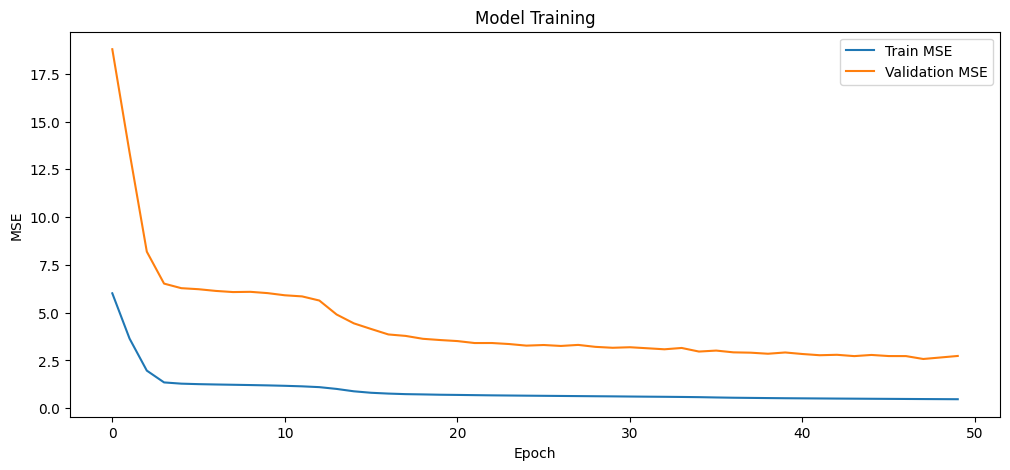

In [39]:
from matplotlib import pyplot as plt

# Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Train MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Model Training')
plt.legend()
plt.show()

As shown in the training and the graph above, the model was trained successfully, with both the training loss and validation loss decreasing over the time spent training. Testing will need to be done with this model for further analysis.

### 4. Experiment with VADER sentiment lexicon

In [40]:
import numpy as np

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def include_sentiment_analysis(df):
    df2 = df.copy()
    # Create text data from text and title
    text_data = df2["text"].to_numpy()

    # Create target vector for VADER. Define a rating of 4 or 5 to be positive, 1 or 2 to be negative and 3 to be neutral
    y = train_Y.apply(lambda x: "positive" if x > 3 else ("negative" if x < 3 else "neutral")).tolist()

    # Analyse with VADER
    analyser = SentimentIntensityAnalyzer()
    correct_predictions = 0

    # (VADER Sentiment Example 2025)
    for text in text_data:
        score = analyser.polarity_scores(text)
        sentiment = "neutral"
        # Classify the sentiment based on the compound score from the analyser
        if score['compound'] > 0.05:
            sentiment = "positive"
        elif score['compound'] < -0.05:
            sentiment = "negative"
        
        # Compare the predicted sentiment with the actual sentiment
        index = text_data.tolist().index(text)
        if sentiment == y[index]:
            correct_predictions += 1
        # Add the score to the balanced_train_df in a new column
        df2.loc[df2["text"] == text, "VADER_Sentiment"] = sentiment

    print(f"VADER accuracy: {round(correct_predictions/len(text_data) * 100, 2)}%")
    return df2


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/dev/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [41]:
balanced_train_df2 = include_sentiment_analysis(balanced_train_df)
test_df2 = include_sentiment_analysis(test_df)
train_X = pad_sequences(tokenizer.texts_to_sequences(balanced_train_df2['text']), maxlen=maxlen)
# Create a training set with the vader sentiment represented as -1 if neutral, 0 if negative and 1 if positive
train_X = np.concatenate((train_X, np.array(balanced_train_df2["VADER_Sentiment"].apply(lambda x: 1 if x == "positive" else (-1 if x == "negative" else 0)).tolist()).reshape(-1, 1)), axis=1)
test_X = np.concatenate((test_X, np.array(test_df2["VADER_Sentiment"].apply(lambda x: 1 if x == "positive" else (-1 if x == "negative" else 0)).tolist()).reshape(-1, 1)), axis=1)

VADER accuracy: 54.04%
VADER accuracy: 93.94%


In order to make use of the VADER sentiment analysis in this experiment, an assumption is made that the ratings which are rated higher would have more positive text, and lower ratings would have more negative text. However, after running the VADER sentiment analysis code over the training data, only 53.99% of the training data was classified correctly by VADER into positive, negative, or neutral, where positive was equivalent to ratings of 4 or 5, neutral was equivalent to a rating of 3, and negative was equivalent to a rating of 1 or 2.

This may indicate that the ratings in the training dataset are not reliable, since it is unlikely that positive words in a rating would result in a lower score, and vice-versa. When compared to the VADER analysis on the test set, it is a very different result, with 93.94% of the ratings being classified correctly as positive, neutral or negative. This indicates that the training set data may not be very reliable, while the test set looks like the ratings are more reliable based on their sentiment.

However, the VADER Sentiment was added to the training dataset anyway to allow the regression model to train with it as an input too. A numerical value was assigned, with 1 being if the text was positive, 0 if neutral and -1 if the text was negative.

In [42]:
vader_model = create_regression_model()

vader_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error')
vader_model.build(train_X.shape)

# Train the model
history = vader_model.fit(
    train_X,
    train_Y,
    epochs=50,
    batch_size=256,
    validation_split=0.2,
)

Epoch 1/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 5.5032 - val_loss: 17.2247
Epoch 2/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 3.5694 - val_loss: 12.6271
Epoch 3/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 2.1286 - val_loss: 7.9958
Epoch 4/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 1.2935 - val_loss: 5.8891
Epoch 5/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 1.0966 - val_loss: 5.5978
Epoch 6/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 1.0439 - val_loss: 5.3718
Epoch 7/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.9911 - val_loss: 5.2642
Epoch 8/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.9858 - val_loss: 5.1740
Epoch 9/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.9732 - val_loss: 5.1493
Epoch 10/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.9589 - val_loss: 5.1108
Epoch 11/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.9549 - val_loss: 5.1118
Epoch 12/50
116/116 ━━━━━━━━━━━━━━━━━━━

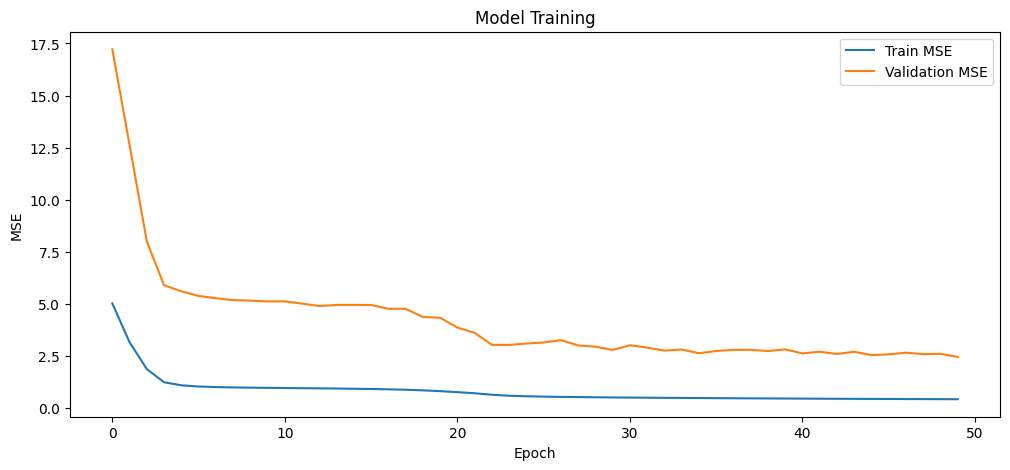

In [43]:
from matplotlib import pyplot as plt

# Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Train MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Model Training')
plt.legend()
plt.show()

It can be seen that the training with the VADER resulted in a similar MSE value on the training and validation data compared to when VADER sentiment analysis was not included. This may be explained by the lack of reliability based on the VADER sentiment result in the training dataset. However, it will still be interesting to see the results of the trained model on the test set after the VADER sentiment analysis.

### 5. Final testing on test set and discussion of results

In [44]:
# Predict the ratings for the test set and check the value compared to the actual ratings
predictions = vader_model.predict(test_X)

# Calculate the mean error
mean_error = abs(np.mean((predictions.flatten() - test_Y.to_numpy().flatten())))
print(f"Mean Error: {mean_error:.2f}")

# Round to the nearest whole number for the prediction
predictions = np.round(predictions).astype(int)

142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Mean Error: 0.74


In [45]:
# Show the predictions which were incorrect by more than 1
incorrect_predictions = np.abs(predictions.flatten() - test_Y.to_numpy().flatten()) > 1
incorrect_reviews = test_df[incorrect_predictions]
print("Incorrect Predictions:")
for i, row in incorrect_reviews.iterrows():
    print(f"Text: {row['text']}")
    print(f"Predicted Rating: {predictions[i][0]}")
    print(f"Actual Rating: {row['rating']}")
    print("-" * 50)

# Print the number of incorrect predictions compared to the total number of predictions
num_incorrect = len(incorrect_reviews)
num_total = len(test_df)
print(f"Total Predictions: {num_total}")
print(f"Number of Correct Predictions: {num_total - num_incorrect}")
print(f"Number of Incorrect Predictions: {num_incorrect}")
# Print the accuracy based on the number of correct predictions
accuracy = (num_total - num_incorrect) / num_total
print(f"Accuracy: {accuracy * 100:.2f}%")

Incorrect Predictions:
Text: surprised return husband celebrated 25th wedding anniversary normally stay high class hotel night wanted try something new without spending fortune st regis ritz etc norm wanted tribeca area pulled hotel unassuming front bell guy nice took care bag right away checking least 3 people come u say happy anniversary starwood platinum set hopefully get upgrade gave 12000 point minimum told u could suite little disappointed would fine giving u great view manager came changed everything gave u nicest suite ever gave u top floor brought champagne chocolate strawberry quickly room best ever room simple beautiful view amazing bed soooo comfortable slept like baby cant say enough bathroom sooo nice would give bathroom 5 star im kidding sheraton impressive dont know havent hotel know nice everyone extremely comfortable made u go back soon go city lot sure go back thank much sheraton wowed u
Predicted Rating: 3
Actual Rating: 5.0
-----------------------------------------

In [46]:
test_X = pad_sequences(tokenizer.texts_to_sequences(test_df['text']), maxlen=maxlen)
# Predict the ratings for the test set and check the value compared to the actual ratings
predictions = model.predict(test_X)

# Calculate the mean error
mean_error = abs(np.mean((predictions.flatten() - test_Y.to_numpy().flatten())))
print(f"Mean Error: {mean_error:.2f}")

# Round to the nearest whole number for the prediction
predictions = np.round(predictions).astype(int)

142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Mean Error: 0.85


In [47]:
# Show the predictions which were incorrect by more than 1
incorrect_predictions = np.abs(predictions.flatten() - test_Y.to_numpy().flatten()) > 1
incorrect_reviews = test_df[incorrect_predictions]
print("Incorrect Predictions:")
for i, row in incorrect_reviews.iterrows():
    print(f"Text: {row['text']}")
    print(f"Predicted Rating: {predictions[i][0]}")
    print(f"Actual Rating: {row['rating']}")
    print("-" * 50)

# Print the number of incorrect predictions compared to the total number of predictions
num_incorrect = len(incorrect_reviews)
num_total = len(test_df)
print(f"Total Predictions: {num_total}")
print(f"Number of Correct Predictions: {num_total - num_incorrect}")
print(f"Number of Incorrect Predictions: {num_incorrect}")
# Print the accuracy based on the number of correct predictions
accuracy = (num_total - num_incorrect) / num_total
print(f"Accuracy: {accuracy * 100:.2f}%")

Incorrect Predictions:
Text: motherdaughter vacation could leave bad comment part stay everyone nice room kept great shape u place clean
Predicted Rating: 2
Actual Rating: 5.0
--------------------------------------------------
Text: beautiful old san francisco hotel hotel beautiful walk real tiffany glass checkin fantastic chandelliers throughout main floor room stayed somewhat small bathroom remodel 60 70 clean adequate bed comfortable really count window opened like real air the hotel step away bart muni streetcar rental car miss one parking fee san francisco hideously high the drawback neighborhood wonder police dont take care financial district really watch place walking warfield theatre passed plenty homeless people andor drug dealer nobody threatened me i think staff nice efficient and think restaurant fantastic real chef cook run kitchen menu item creative expertly preparedchef actually met u lobby informed u newest creation could refuse oh yes definitely return
Predicted Rating

For the experiments done with the models trained above, a predictions is said to be "correct" if the difference between the prediction and the actual rating is less than 1. Both the model trained with the VADER sentiment included in the input and the model trained without it were tested against the test data.

The mean error has also been calculated for each model. The model with the VADER sentiment included had a mean error of 0.74, and the model without the VADER sentiment had a mean error of 0.85. Consequently, the model with the VADER sentiment had an accuracy of 82.71%, and the model without had an accuracy of 75.35%.

The model with the VADER sentiment analysis was able to perform better than the model without after training for 50 epochs. This is interesting to see as the VADER sentiment was not clearly mapping well to the training data ratings, but the model still outperformed the model without the VADER sentiment. This may still indicate that the training data is unreliable but with training for more epochs, the unreliable data's effects may be lessened. In previous tests, with training for less epochs, the models both did not perform as well, which initially led me to assume that there was an issue with the training data.

Given the results, it may be assumed that there is a slight issue with the reliability of the ratings, with each of the classical machine learning models, the deep learning model with VADER sentiment and the model without performing well, but not as well as expected. Overall, the results from the above experiments show that 75-80% of the time the ratings can be relied on when making decisions, but this should be taken into consideration by the customer service manager.

In [48]:
# Show the predictions which were incorrect by more than 2
incorrect_predictions = np.abs(predictions.flatten() - test_Y.to_numpy().flatten()) > 2
incorrect_reviews = test_df[incorrect_predictions]

# Print the number of incorrect predictions compared to the total number of predictions
num_incorrect = len(incorrect_reviews)
num_total = len(test_df)

# Print the accuracy based on the number of correct predictions
accuracy = (num_total - num_incorrect) / num_total
print(f"Accuracy where difference between prediction and rating is less than 2: {accuracy * 100:.2f}%")

Accuracy where difference between prediction and rating is less than 2: 98.45%


However, the code above shows the accuracy of the ratings we consider it a success if the difference between the predicted rating and the actual rating is less than 2. The result above shows that 92.22% of predicted ratings are within 2 stars of the actual rating. This would indicate that there may be subtle differences between the 4 and 5 star ratings as well as the 1 and 2 star ratings. It may be more beneficial to train a model that can predict whether a rating will just be positive, negative, or neutral, as this may be able to be modelled better, without the need to consider the nuances between the individual star ratings. The Customer Service Manager should consider how close the ratings should be, and consider using a model that will have more general classifications rather than making them specific to a star rating.

### 6. Propose a method to predict aspects 

***(COMP SCI 7417 and COMP SCI 7717 only)***

Another desired outcome of applying natural language processing over the reviews for the hotels is to understand how the text can be used to predict each of the aspects that make up the overall rating. The training and testing datasets contain ratings that, as well as the overall rating, are made up of service, cleanliness, value, rooms, and location. By applying NLP techniques to the datasets, it is possible to develop models that are able to predict each of the rating aspects based on the title and text of a review.

One method of being able to predict each of the aspects based on the text is Aspect-Based Sentiment Analysis. Based on the framework proposed by Aziz et al., to perform the Aspect-Based Sentiment Analysis the processing that the model will perform involves aspect term extraction, opinion term extraction, aspect level sentiment classification, aspect-opinion pair extraction, aspect and sentiment co-extraction, aspect-opinion pairing and finally aspect-sentiment-triplet extraction, where the model would form a result containing each aspect, the opinion and the sentiment (Azis et al. 2024). The model proposed by Aziz et al., which uses the above structure, was seen to perform very well when evaluated against reviews for different technology products like laptops, headphones and cameras. The result of this model was able to generate the triplets which contain the aspect that is analysed, the opinion relating to the aspect, and the sentiment.

This method could be applied to the prediction of the different aspects of the rating by first creating the triplets using the above method. A neural network model could then be trained on the triplets in order to learn which of the triplets are most likely to result in a higher rating for each aspect. For example, the ratings for the service may be able to be indicated by aspects of the text such as the staff or communications, and more positive opinions on these aspects would indicate that the rating for the service would be higher.

It is also important to consider what preprocessing would be beneficial to use when predicting the different aspects of the ratings. Some investigation has been done into how preprocessing text can affect the sentiment analysis for text in reviews, especially those entered online through websites. The work done by Kavanagh et al. shows that VADER sentiment analysis was able to perform better with preprocessing such as lemmatisation and spell checking (2023). As such, for the prediction of different aspects, it would be ideal to apply preprocessing to the dataset to improve the sentiment analysis before the Aspect-Based Sentiment Analysis is applied.

By combining the above methods, the different aspects of the ratings can be predicted, as well as the overall rating. However, the methods do rely on the training dataset being reliable in regards to the ratings, and given that the training to determine the overall rating was not fully accurate, a new dataset should be used, so that the model is able to fit better.

### 7. Reflection on the ***Product*** development.

In order to start creating the product, I first began with implementing methods to load the training and testing JSON data into Pandas DataFrames in version 1 and 2. This required some investigation as I had not loaded JSON data to Pandas DataFrames previously, in other code I have mostly loaded data from CSV files. After finding the correct methods and using them, I began with some exploratory data analysis by using some of the methods explored in workshops for this course and others, to display graphs and analyse the texts. I adapted code from other workshops to analyse how the ratings were distributed, which words were most positive or negative, which words were most frequent in the dataset, and which tri-grams were most common. The resources given in workshops for courses I have done were very useful for this part of the assignment since I could easily adapt them to explore this type of data. Through my draft versions, I also explored applying lemmatisation before and after the EDA, and I ended up applying the lemmatisation afterwards, to keep the anaylsis accurate to the original texts.

After this, the next step was to select and then the train machine learning models on the training dataset in version 6. I selected a Multinomial Naive Bayes model for the classical machine learning method to be used on the dataset. I selected this model since I had seen in workshops that it worked well for classifying data into categories and each of the overall star ratings can be considered a category.  Methods from the workshop were applied in training this model including vectorising the input data so that the model can use it to train. 

When training a deep learning model in version 7, I chose to use TensorFlow and make use of the GPU in my PC. Getting the model set up on my PC was challenging as I faced some memory issues, however once I got it working, I now know how it should be set up, and can use it for other machine learning tasks in the future. After some research, I found a deep learning regression model that had performed well in predicting numerical ratings from text. This model was chosen as it would be easy to compare the predicted rating for a text to the actual rating, it would also allow for calculations of partial ratings rather than needing discrete categories like the Multinomial Naive Bayes method. I did experiment with a similar method that would produce a categorical classification rather than using regression, but ultimately, I decided a different method would be more interesting to compare with the Multinomial Naive Bayes to see how they behave differently.

In version 12, I added the VADER sentiment analysis. This was quite simple to implement given the example code, and I chose to add it to the input for the machine learning model and retrain. This had a slightly different result to the model that didn't include the sentiment analysis. However I found that there may have been unreliable data in the dataset, preventing the machine learning models from converging on a solution. If I had more time I would like to continue investigating this issue.

In version 16, I was doing more testing and found that I was able to get a prediction with a very high accuracy being within 1 star difference of the actual rating. However, this led me to find an issue with how I was defining the VADER model compared to the model without VADER, and fixing it. This led to me fixing how the models were defined and getting the final results with the VADER sentiment analysis.

To improve the results, I would like to have a training dataset that I can confirm to be labelled well compared to the text in the reviews. The nature of the problem given in this assignment meant that it was very exploratory and in order to determine if the reviews are accurate, the training needs to be done. It may be better to determine if the reviews are accurate by using a model that is known to work well for classifying text reviews and test the results on the given reviews. If that model performed poorly on these reviews, but well on reviews that are known to be accurate, then it would be simple to determine how reliable the reviews are.

A final test was done in version 26, where the machine learning models were trained for more epochs. Instead of the 25 epochs that I trained for previously, now I trained them each for 50 epochs. This resulted in better accuracy for both models, which I did not expect since I believed the loss had already reached a minimum. More investigation is needed here, but due to a lack of time will not be completed in this assignment.

### 9. References

Amirifar, T 2022, An NLP-Deep Learning approach for Product Rating Prediction Based on Online Reviews and Product Features’, *Partial Fulfillment of the Requirements*, viewed 4 Apr 2025, <https://spectrum.library.concordia.ca/id/eprint/990578/2/Amirifar_MASc_F2022.pdf>.

Applied Natural Language Processing 2025, 'Exploratory Data Analysis', Applied Natural Language Processing workshop 2 code files, The University of Adelaide, in Week 2, Semester 1, 2025.

Applied Natural Language Processing 2025, 'Feature Engineering', Applied Natural Language Processing workshop 2 code files, The University of Adelaide, in Week 2, Semester 1, 2025.

Applied Natural Language Processing 2025, 'VADER Sentiment Example', Applied Natural Language Processing Assignment 1 code files, The University of Adelaide, in Semester 1, 2025.

Aziz, K, Ji, D, Chakrabarti, P, Chakrabarti, T, Shahid Iqbal, M & Abbasi, R 2024, 'Unifying aspect-based sentiment analysis BERT and multi-layered graph convolutional networks for comprehensive sentiment dissection', *Scientific Reports*, no. 14, article 14646.

Kavanagh, J, Greenhow, K, Jordanous, A 2023, 'Assessing the Effects of Lemmatisation and Spell Checking on Sentiment Analysis of Online Reviews', *2023 IEEE 17th International Conference on Semantic Computing (ICSC)*, pp. 235-238, doi: 10.1109/ICSC56153.2023.00046.

Mining Big Data 2025, 'Income Evaluation Notebook', Mining Big Data workshop 1 code files, The University of Adelaide, in Week 1, Semester 1, 2025.

malamahadevan, 2025, Step-by-Step Exploratory Data Analysis (EDA) using Python, *Analytics Vidhya*, viewed 24 Mar 2025 <https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/>.

Murel, J, Kavlakoglu, E, 2023, What are stemming and lemmatization?, *IBM*, viewed 01 Apr 2025, <https://www.ibm.com/think/topics/stemming-lemmatization>.

NumFOCUS, Inc., 2024, pandas.DataFrame.to_csv, *pandas*, viewed 29 Mar 2025, <https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html>.

NumFOCUS, Inc., 2024, pandas.read_csv, *pandas*, viewed 29 Mar 2025, <https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html>.

NumFOCUS, Inc., 2024, pandas.json_normalize, *pandas*, viewed 29 Mar 2025, <https://pandas.pydata.org/pandas-docs/version/1.2.0/reference/api/pandas.json_normalize.html>.

Poliak, S, 2020, 1 to 5 Star Ratings – Classification or Regression?, *towards data science*, viewed 29 Mar 2025, <https://towardsdatascience.com/1-to-5-star-ratings-classification-or-regression-b0462708a4df/>.

Reitz, K, 2016, Raw Response Content, *Requests Documentation*, viewed 29 Mar 2025, <https://requests.readthedocs.io/en/latest/user/quickstart/#raw-response-content>.

Saturn Cloud, 2024, How to Remove Special Characters in Pandas Dataframe, *Saturn Cloud*, viewed 29 Mar 2025, <https://saturncloud.io/blog/how-to-remove-special-characters-in-pandas-dataframe/#use-lambda-function>.

Sriram, 2024, Multinomial Naive Bayes Explained: Function, Advantages & Disadvantages, Applications, *UpGrad*, viewed 3 Apr 2025, <https://www.upgrad.com/blog/multinomial-naive-bayes-explained/>.

### Appendix